# PPMtools: Nuclear burning

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/user/andrassy/PyPPM')
from ppmpy import ppm
from matplotlib import pyplot as plt
%matplotlib nbagg
from nugridpy import utils
from nugridpy import astronomy as ast
cb = utils.colourblind

In [2]:
yprof_paths = {'F4':'/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4/', \
               'E10':'/data/ppm_rpod2/YProfiles/RAWD/E10/'}
yprofs = {rid:ppm.yprofile(path) for rid, path in yprof_paths.items()}

rprof_paths = {'N3':'/user/niagara_projects/PPM2.0/N_LowZRARD/N3-LowZRAWD-1152-10x/prfs/'}
rp_sets = {rid:ppm.RprofSet(path) for rid, path in rprof_paths.items()}

run_data = {**yprofs, **rp_sets}

Reading attributes from file  YProfile-01-0426.bobaaa
There are 427 YProfile files in the /data/ppm_rpod2/YProfiles/RAWD/E10/ directory.
Ndump values range from 0 to 426
Time values range from 106.86 to 23028.4
Reading attributes from file  YProfile-01-1959.bobaaa
There are 1960 YProfile files in the /data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/F4/ directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0
400 rprof files found in '/user/niagara_projects/PPM2.0/N_LowZRARD/N3-LowZRAWD-1152-10x/prfs/.
Dump numbers range from 0 to 399.
Reading history file '/user/niagara_projects/PPM2.0/N_LowZRARD/N3-LowZRAWD-1152-10x/prfs/LZRAWD01152-0000.hstry'.


## .rprof data
### N3

.rprof files contain all parameters specifying the properties of the two fluids and concentrations of reactants in the two fluids. There is no need to enter these values, although the user can still replace the values read from the .rprof files in the same way as they would enter them for .yprof data, see below. A temperature correction function was used in run N3 shown here, which is entered via the optional argument extra_args. The resulting energy generation rate per unit volume (enuc) is compared with the same quantity read from the .rprof file (enuc/(dt/3.)). The disagreement between the two profiles above 23 Mm is caused by a bug in the temperature calculation in the code.

<IPython.core.display.Javascript object>


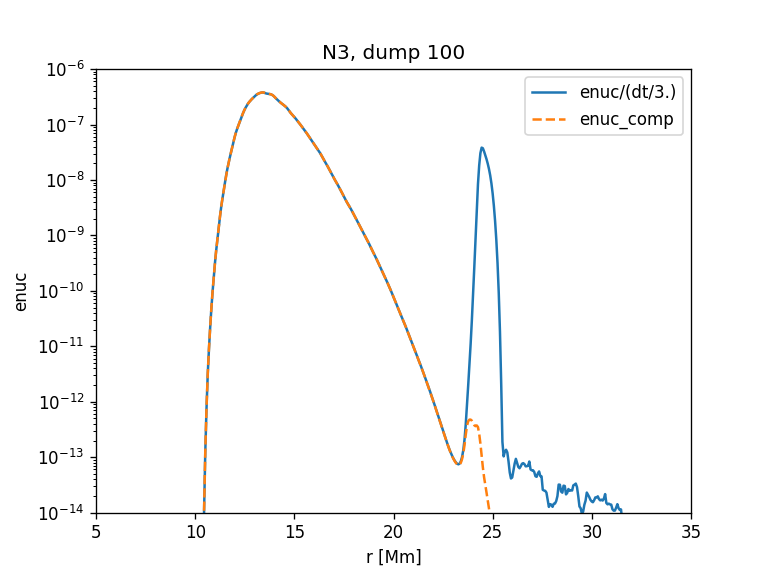

L_H = 5.619e+06 L_Sun
L_He = 1.458e+08 L_Sun
L_H/L_He = 0.0385


In [7]:
rid = 'N3'
dmp = 100
dt =  1.73431877E-02
r = run_data[rid].get('R', dmp)
enuc = run_data[rid].get('Enuc', dmp)

T9corr_params = {'kind':1, 'params':{'a':0.46, 'b':0.77}}
extra_args = {'T9corr_params':T9corr_params}
enuc_comp = run_data[rid].compute('enuc_C12pg', dmp, extra_args=extra_args)

ifig=1; plt.close(ifig); plt.figure(ifig, dpi=100)
plt.semilogy(r, enuc/(dt/3.), '-', label='enuc/(dt/3.)')
plt.semilogy(r, enuc_comp, '--', label='enuc_comp')
plt.xlim((5., 35.))
plt.ylim((1e-14, 1e-6))
plt.xlabel('r [Mm]')
plt.ylabel('enuc')
plt.legend(loc=0)
plt.title(rid + ', dump ' + str(dmp))

dr = ppm.cdiff(r)
dV = 4.*np.pi*r**2*dr
L_H = np.sum(enuc_comp*dV)
L_He = run_data[rid].get('totallum', dmp)
print('L_H = {:.3e} L_Sun'.format((1e43/ast.lsun_erg_s)*L_H))
print('L_He = {:.3e} L_Sun'.format((1e43/ast.lsun_erg_s)*L_He))
print('L_H/L_He = {:.4f}'.format(L_H/L_He))

## .yprof data
### F4

.yprof files do not contain parameters specifying the properties of the two fluids. The user has to enter them via the optional argument extra_args as shown below. No temperature correction was used in run F4, so we do not specify any.

<IPython.core.display.Javascript object>


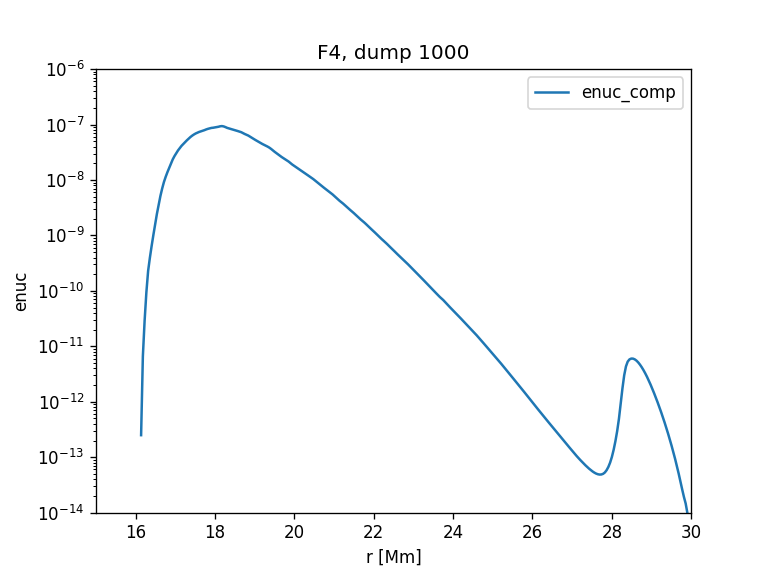

L_H = 2.188e+06 L_Sun
L_He = 1.749e+07 L_Sun
L_H/L_He = 0.1251


In [4]:
rid = 'F4'
dmp = 1000
r = run_data[rid].get('Y', dmp, resolution='l')
extra_args = {'airmu':1.39165, \
              'cldmu':0.725, \
              'fkair':0.203606102635, \
              'fkcld':0.885906040268, \
              'atomicnoair':6.65742024965, \
              'atomicnocld':1.34228187919}
enuc_comp = run_data[rid].compute('enuc_C12pg', dmp, extra_args=extra_args)

# This factor accounts for the heating bug.
enuc_comp *= 1.5

ifig=2; plt.close(ifig); plt.figure(ifig, dpi=100)
plt.semilogy(r, enuc_comp, '-', label='enuc_comp')
plt.xlim((15., 30.))
plt.ylim((1e-14, 1e-6))
plt.xlabel('r [Mm]')
plt.ylabel('enuc')
plt.legend(loc=0)
plt.title(rid + ', dump ' + str(dmp))

dr = -ppm.cdiff(r)
dV = 4.*np.pi*r**2*dr
L_H = np.sum(enuc_comp*dV)
L_He = 2.25*2.98384e-03
print('L_H = {:.3e} L_Sun'.format((1e43/ast.lsun_erg_s)*L_H))
print('L_He = {:.3e} L_Sun'.format((1e43/ast.lsun_erg_s)*L_He))
print('L_H/L_He = {:.4f}'.format(L_H/L_He))

### E10

Run E10 needs a temperature correction. We simply add it to extra_args.

<IPython.core.display.Javascript object>


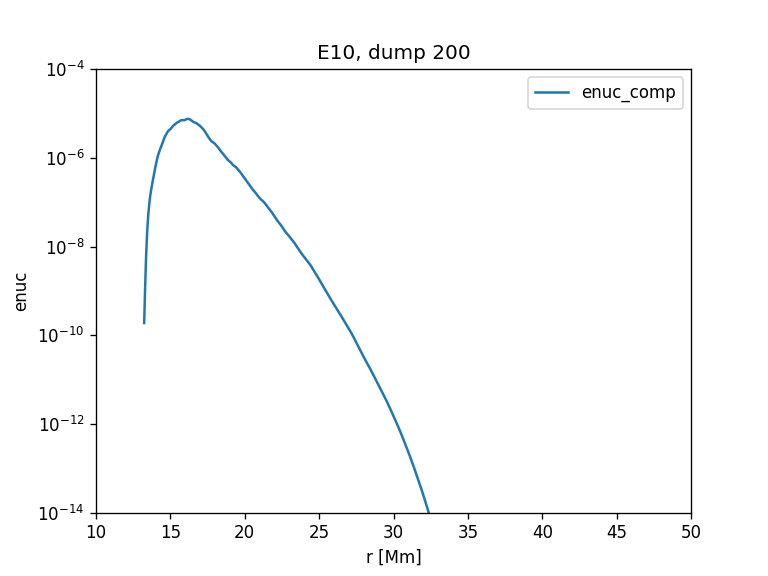

L_H = 1.855e+08 L_Sun
L_He = 8.957e+09 L_Sun
L_H/L_He = 0.0207


In [5]:
rid = 'E10'
dmp = 200
r = run_data[rid].get('Y', dmp, resolution='l')
T9corr_params = {'kind':1, 'params':{'a':0.6, 'b':0.85}}
extra_args = {'T9corr_params':T9corr_params, \
              'airmu':1.4, \
              'cldmu':0.3, \
              'fkair':0.203606102635, \
              'fkcld':0.885906040268, \
              'atomicnoair':6.65742024965, \
              'atomicnocld':1.34228187919}
enuc_comp = run_data[rid].compute('enuc_C12pg', dmp, extra_args=extra_args)

# This factor accounts for the heating bug.
enuc_comp *= 1.5

ifig=3; plt.close(ifig); plt.figure(ifig, dpi=100)
plt.semilogy(r, enuc_comp, '-', label='enuc_comp')
plt.xlim((10., 50.))
plt.ylim((1e-14, 1e-4))
plt.xlabel('r [Mm]')
plt.ylabel('enuc')
plt.legend(loc=0)
plt.title(rid + ', dump ' + str(dmp))

dr = -ppm.cdiff(r)
dV = 4.*np.pi*r**2*dr
L_H = np.sum(enuc_comp*dV)
L_He = 2.25*1.5283
print('L_H = {:.3e} L_Sun'.format((1e43/ast.lsun_erg_s)*L_H))
print('L_He = {:.3e} L_Sun'.format((1e43/ast.lsun_erg_s)*L_He))
print('L_H/L_He = {:.4f}'.format(L_H/L_He))